# CLUSTERING - K-MEANS

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

In [93]:
pp_train = pd.read_csv("pp_train.csv")
pp_train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,is_Fantasy,is_Family,is_Mystery,is_Talk-Show,is_Drama,is_Sport,is_War,is_Horror,is_Animation,fill_runtimeMinutes
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,0,21,...,0,0,0,0,0,0,0,0,1,40.0
1,Looping,6,1982,NaN,NaN,0.0,11,1,0,1,...,0,0,0,0,0,0,0,0,0,28.0
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,0,24,...,0,0,0,0,0,0,0,0,0,90.0
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,0,0,0,0,0,0,0,0,0,31.0
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,0,0,0,0,1,0,0,0,0,80.0


In [94]:
pp_train.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'countryOfOrigin', 'is_Documentary', 'is_History', 'is_Adventure',
       'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance',
       'is_Biography', 'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir',
       'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime',
       'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show',
       'is_Drama', 'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes'],
      dtype='object')

### Definizione delle feature numeriche da usare per clustering

In [95]:
numeric = pp_train[["startYear", "awardWins", "numVotes", "totalImages", "totalVideos", "totalCredits", "criticReviewsTotal", 
                    "awardNominationsExcludeWins", "numRegions", "userReviewsTotal", "fill_runtimeMinutes"]]

#da qui escludiamo endYear perchè ha dei NaN e k-means non sa gestirli

### Log-transformation delle variabili numeriche

In [96]:
data_log = np.log1p(numeric)
X_numeric_log = data_log.values
#X = pp_train.iloc[:,:].values ---> questo comodo se nel dataset avessimo solo var numeriche

### Normalizzazione con z-score e minmax

In [97]:
scaler = StandardScaler() 
scaler.fit(X_numeric_log) #x è la numpy matrix of the dataset
X_scal = scaler.transform(X_numeric_log)

In [98]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X_numeric_log)

### Choice of the optimal number of clusters

###### il ciclo for su k permette di identificare il best number of clusters da utilizzare nell'algoritmo; lo si trova vedendo SSE e silhouette

In [99]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_scal) 
    #kmeans.fit(X_minmax) 
    sse_list.append(kmeans.inertia_)

In [100]:
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_scal)
    #kmeans.fit(X_minmax) 
    sil_list.append(silhouette_score(X_scal, kmeans.labels_))
    #sil_list.append(silhouette_score(X_minmax, kmeans.labels_))

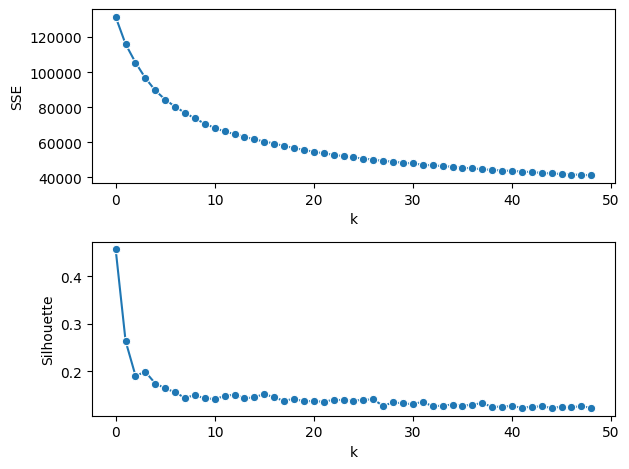

In [101]:
fig, axs = plt.subplots(2) 

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')

sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout()

In [135]:
print('SSE', kmeans.inertia_) #---> capire a che valore di k corrisponde questo sse di 105357
print('Silhouette', silhouette_score(X_scal, kmeans.labels_))

SSE 105375.61629311592
Silhouette 0.19068125518960283


## SULLA BASE DEI VALORI QUI SOPRA INIZIALIZZARE IL MODELLO CON IL NUMERO ADATTO DI K

### Inizializzazione modello

In [102]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=94) #inizializziamo algoritmo, fit it per lavorare sull'exact data
#iniziamo con 3 cluster, 10 iterations, random_state: allows to have the same result 

kmeans.fit(X_scal)
#kmeans.fit(X_minmax)
#kmeans.fit(D_scaled) #---> numpy array di mixed matrix tra distanze di var numeriche e var binarie (per configurazione vedere drive)

KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=94)

### Visualizzazione cluster
#### ---> per selezionare le feature da mettere sugli assi, chat dice di valutare la correlation matrix

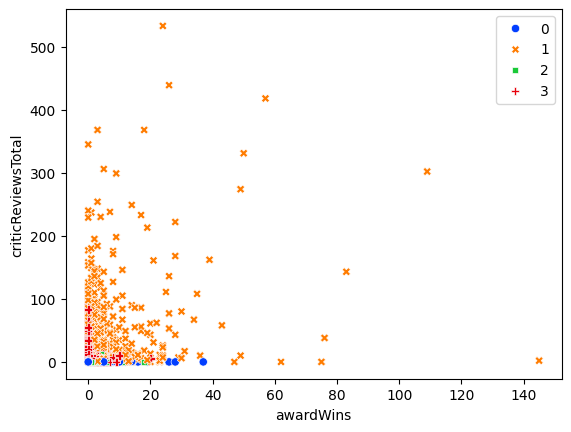

In [103]:
sns.scatterplot(data=pp_train, 
                x="awardWins",
                y="criticReviewsTotal",
                hue=kmeans.labels_,
                style=kmeans.labels_, #usiamo labels date da k-means
                palette="bright")
plt.show()

### PCA per visualizzazione

##### prima KMEANS e poi PCA

C:\Users\Gagia\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


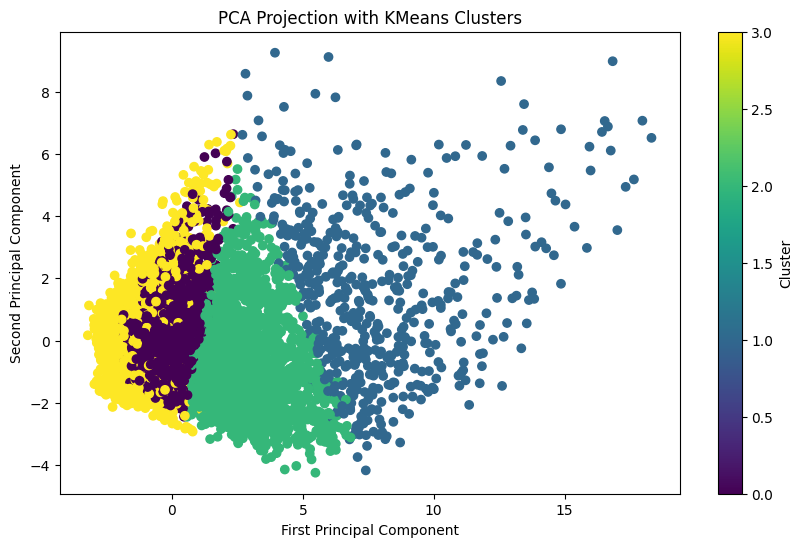

In [106]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def pca_clustering(df, n_clusters=3):
    # Select features
    features = [
        "startYear", "awardWins", "numVotes", "totalImages", "totalVideos", 
        "totalCredits", "criticReviewsTotal", "awardNominationsExcludeWins", 
        "numRegions", "userReviewsTotal", "fill_runtimeMinutes"
    ]
    
    # Prepare data
    X = df[features].copy()
    X = np.log1p(X)  # Log transform to handle skewed distributions
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform KMeans clustering on preprocessed data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Apply PCA on preprocessed data
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # Determine components explaining 80% variance
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cum_var_ratio >= 0.8) + 1
    
    # Plot the first two principal components with cluster labels
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA Projection with KMeans Clusters')
    plt.colorbar(scatter, label='Cluster')
    plt.show()
    
    # Return results
    explained_var = pd.DataFrame(
        pca.components_[:n_components].T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=features
    )
    
    return clusters, explained_var, pca.explained_variance_ratio_

# Example usage
pp_train = pd.read_csv("pp_train.csv")
clusters, explained_var, var_ratio = pca_clustering(pp_train, n_clusters=4)


### Identificazione numero di componenti per PCA

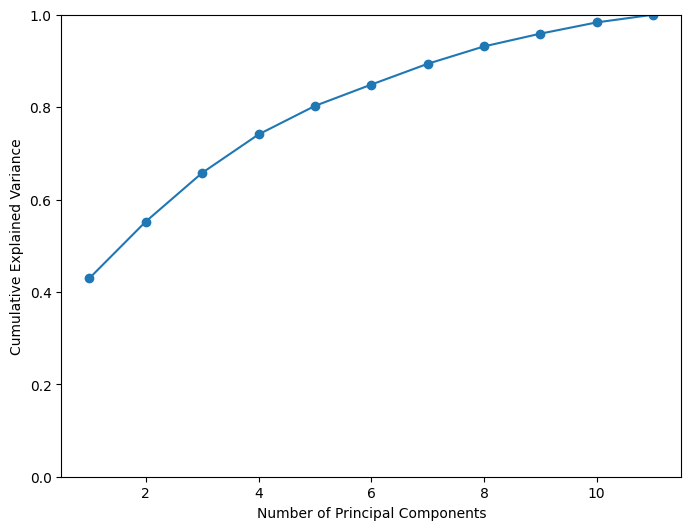

In [116]:
from sklearn.preprocessing import StandardScaler

def visualize_pca_components(df):
    # Select clustering variables
    features = ['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 
                'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 
                'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal']
    X = df[features]
    
    # Apply log transformation to handle skewness
    X = np.log1p(X)
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    pca = PCA()
    pca.fit(X_scaled)
    
    # Calculate cumulative explained variance ratio
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio, marker='o')
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Cumulative Explained Variance')
    ax.set_ylim(0, 1)  # Imposta l'intervallo dell'asse y da 0 a 1
    plt.show()

# Example usage
visualize_pca_components(pp_train)


In [117]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def determine_pca_components(df):
    # Select clustering variables
    features = ['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 
                'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 
                'awardNominationsExcludeWins', 'numRegions', 'userReviewsTotal']
    X = df[features]
    
    # Apply log transformation to handle skewness
    X = np.log1p(X)
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    pca = PCA()
    pca.fit(X_scaled)
    
    # Calculate cumulative explained variance ratio
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Determine optimal number of components
    for i, ratio in enumerate(cum_var_ratio):
        if ratio >= 0.8:
            return i + 1
    
    return len(cum_var_ratio)

# Example usage
pp_train = pd.read_csv('pp_train.csv')
optimal_components = determine_pca_components(pp_train)
print(f"Optimal number of principal components: {optimal_components}")

Optimal number of principal components: 5


### Pairplot per valutare visualizzazione di clustering con numero di PC identificate come ottimali

C:\Users\Gagia\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


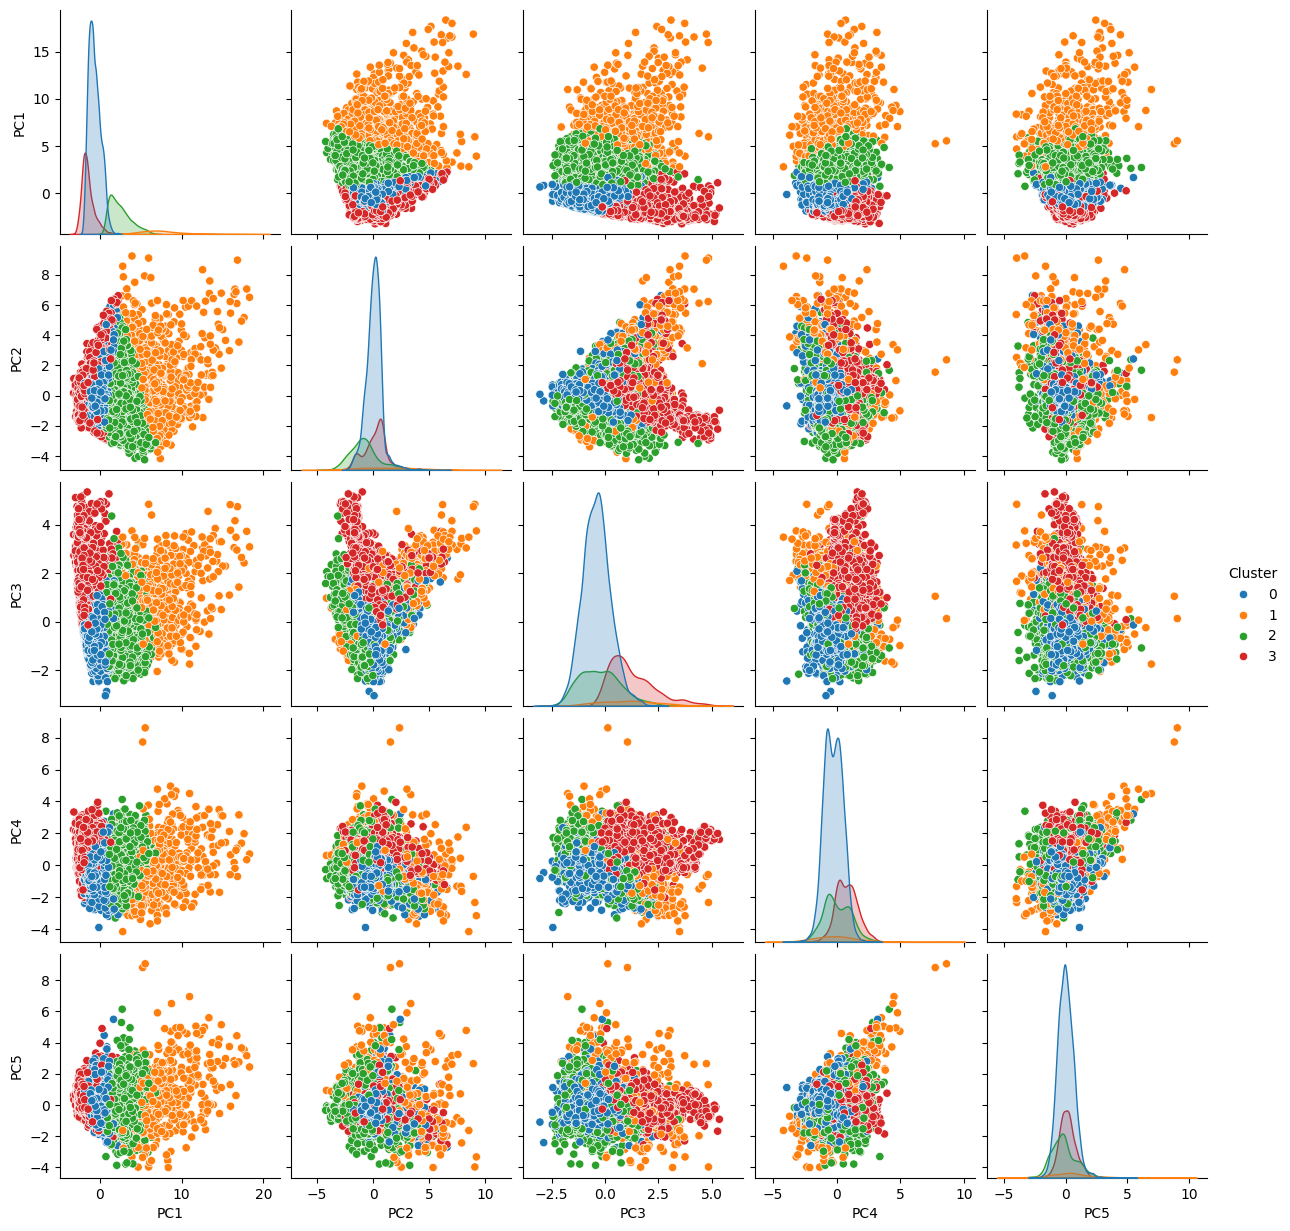

In [136]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pca_kmeans(df, features, n_components=5, n_clusters=4):
    """
    Applica PCA e K-Means ai dati preprocessati e visualizza i risultati.

    :param df: DataFrame originale con i dati
    :param features: Lista delle feature da utilizzare
    :param n_components: Numero di componenti principali per la PCA
    :param n_clusters: Numero di cluster per il K-Means
    """
    # Preprocessamento: Log-transform e scaling
    X = df[features].copy()
    X = np.log1p(X)  # Log-transform
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Applica PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Crea un DataFrame con le componenti principali
    pca_columns = [f"PC{i+1}" for i in range(n_components)]
    pca_df = pd.DataFrame(X_pca, columns=pca_columns)

    # Applica K-Means sui dati preprocessati (X_scaled)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Aggiungi i cluster come colonna al DataFrame delle componenti principali
    pca_df['Cluster'] = clusters

    # Visualizza un pairplot delle prime 3 componenti principali colorate per cluster
    sns.pairplot(
        data=pca_df,
        vars=["PC1", "PC2", "PC3", "PC4", "PC5"],  #--------------------------------------------> capire come gestire questa cosa dato che il numero ottimale sarebbe 5
        hue="Cluster",               # Colora in base ai cluster
        diag_kind="kde",             # Distribuzione kernel sulle diagonali
        palette="tab10"              # Palette di colori per i cluster
    )

    plt.show()

# Esempio di utilizzo
features = [
    "startYear", "awardWins", "numVotes", "totalImages", "totalVideos",
    "totalCredits", "criticReviewsTotal", "awardNominationsExcludeWins",
    "numRegions", "userReviewsTotal", "fill_runtimeMinutes"
]

# Supponendo che il DataFrame originale sia chiamato `df`
plot_pca_kmeans(pp_train, features, n_components=5, n_clusters=4)


### Identificazione dei centroidi

In [108]:
kmeans.cluster_centers_ #coordinates with centroids

array([[-0.30414701, -0.05351723, -0.56361061, -0.4618853 , -0.1902206 ,
        -1.14470361, -0.40554808, -0.12665621, -0.44080363, -0.36614268,
        -1.41164294],
       [ 0.37492344,  2.89767609,  2.53683612,  2.12117814,  2.88034485,
         1.4770801 ,  2.95039644,  3.49495588,  2.4792317 ,  2.77281952,
         0.74220716],
       [ 0.09685042, -0.18301724, -0.28754212, -0.2453587 , -0.20169644,
         0.08650632, -0.33307244, -0.19491119, -0.2790257 , -0.36232219,
         0.27227348],
       [-0.07025237,  0.15888966,  1.19118493,  1.00292358,  0.38667788,
         0.72136634,  1.09285415,  0.1703513 ,  1.0303775 ,  1.18687837,
         0.50342147]])

In [109]:
centers = scaler.inverse_transform(kmeans.cluster_centers_) #from normalized to input domain
centers

array([[  7.51573569,  -0.26670885,  -4.96578824,  -3.76988277,
         -1.05702317, -11.06258862,  -2.54700245,  -0.66979189,
         -0.87406314,  -3.16827713, -11.3026027 ],
       [  7.56655051,  14.44087774,  32.20777868,  17.31294097,
         16.0055811 ,  14.2747253 ,  18.5296575 ,  18.48225994,
          9.5076788 ,  23.99354479,   5.94263066],
       [  7.54574231,  -0.91208591,  -1.65579739,  -2.00260443,
         -1.12079245,   0.83601013,  -2.09182677,  -1.03074244,
         -0.2988863 ,  -3.13521799,   2.1800123 ],
       [  7.53323802,   0.79184355,  16.07376346,   8.18580793,
          2.14870248,   6.97139328,   6.86355666,   0.90086316,
          4.35649781,  10.27020295,   4.03074512]])

In [110]:
pp_train['kmeans_labels'] = kmeans.labels_
pp_train['kmeans_labels'] = pp_train['kmeans_labels'].map({0:"A", 1: "B", 2: "C"})

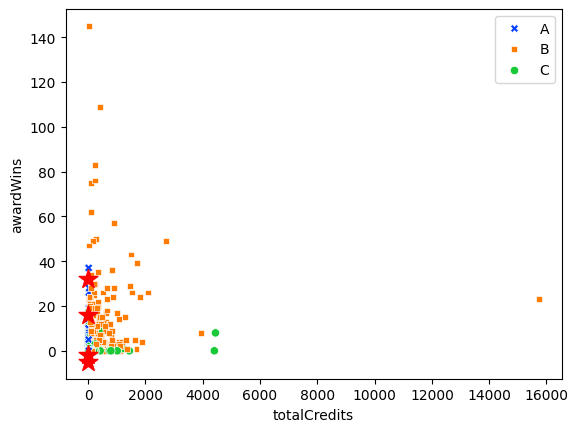

In [111]:
sns.scatterplot(data=pp_train, 
                x="totalCredits", 
                y="awardWins", 
                hue='kmeans_labels', 
                style='kmeans_labels',
                palette="bright", 
                hue_order=["A", "B", "C"]
               )
plt.legend()
#qui è giusto che centers sia :,1 se in quello di fedele dice [:,2]?
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200) #plotting the centroids
plt.show()

#### Mapping della variabile target (per noi è titleType volendo) così da confrontarla dopo con gli eventuali cluster/individuare quali cluster contengono un'alta percentuale di quale categoria di titleType

In [112]:
y = np.array(pp_train['titleType'])
y_map = {"tvEpisode": 0, "videoGame": 1, "movie": 2, "tvSeries": 3, "video": 4,
         "tvMiniSeries": 5, "short": 6, "tvMovie": 7, "tvSpecial": 8, "tvShort": 9}

y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map) #target label

### Confronto con target variable

In [113]:
y_mapped

0        0
1        1
2        2
3        3
4        3
        ..
16426    2
16427    2
16428    2
16429    2
16430    6
Name: 0, Length: 16431, dtype: int64

In [114]:
y_mapped.groupby(pp_train['kmeans_labels']).value_counts(normalize=True)
#qui si vede quanta percentuale di titleType (i numeri da 0 a 9) appartiene a quale cluster (A, B, C)

kmeans_labels  0
C              0    0.382317
A              0    0.136892
B              0    0.001869
A              1    0.038932
B              1    0.013084
C              1    0.009555
B              2    0.766355
C              2    0.340877
A              2    0.025432
B              3    0.162617
C              3    0.082981
A              3    0.067190
C              4    0.061658
A              4    0.040188
B              4    0.005607
C              5    0.015590
B              5    0.009346
A              5    0.004396
               6    0.661852
C              6    0.025951
B              6    0.024299
C              7    0.066486
B              7    0.013084
A              7    0.010989
C              8    0.014383
B              8    0.003738
A              8    0.002826
               9    0.011303
C              9    0.000201
Name: proportion, dtype: float64